# Explaining Models with SHAP

Kris Barbier

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set pandas to display more columns
pd.set_option('display.max_columns',50)

In [2]:
#Model evaluation function
def evaluate_regression(model, X_train,y_train, X_test, y_test):
    """Evaluates a scikit learn regression model using r-squared and RMSE"""

    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train,
                                            squared=False)

    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")


    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test,
                                            squared=False)

    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [3]:
#Import model with joblib
import joblib
loaded = joblib.load('random_forest_l01.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForest'])

In [4]:
#Load in each variable
X_train_df = loaded['X_train']
y_train = loaded['y_train']
X_test_df = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
loaded_model = loaded['RandomForest']

In [5]:
#Evaluate loaded model
evaluate_regression(loaded_model, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.94	RMSE= 424.61
Test Data:	R^2= 0.56	RMSE= 1104.76


In [6]:
#Import SHAP
import shap
shap.initjs()

In [7]:
#Check length of X_train_df
len(X_train_df)

6392

In [8]:
#Create X_shap variable
X_shap = shap.sample(X_train_df, nsamples = 400, random_state = SEED)
X_shap

Item_Weight  Item_Visibility  Item_MRP  Item_Fat_Content_Regular  \
3888       15.850         0.110653   36.9506                       1.0   
2497       15.100         0.087407  221.8456                       1.0   
7723       17.500         0.015592  184.8266                       0.0   
8117       10.800         0.049820  243.2144                       0.0   
7475       15.000         0.044999  140.4838                       0.0   
...           ...              ...       ...                       ...   
292        12.850         0.033288  198.4768                       0.0   
3035        8.895         0.088682  121.9730                       1.0   
6832       10.395         0.030282  116.3176                       0.0   
8455       18.000         0.073607  156.6972                       0.0   
7795       19.600         0.047858   45.0770                       0.0   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
3888                     0.0               0.0                  0.0   
2497                     0.0               0.0                  0.0   
7723                     0.0               0.0                  0.0   
8117                     0.0               0.0                  0.0   
7475                     0.0               0.0                  0.0   
...                      ...               ...                  ...   
292                      0.0               0.0                  0.0   
3035                     0.0               0.0                  0.0   
6832                     1.0               0.0                  0.0   
8455                     0.0               0.0                  0.0   
7795                     0.0               0.0                  0.0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
3888               0.0              0.0                     1.0   
2497               0.0              0.0                     0.0   
7723               0.0              0.0                     0.0   
8117               0.0              0.0                     0.0   
7475               0.0              0.0                     0.0   
...                ...              ...                     ...   
292                0.0              0.0                     0.0   
3035               0.0              0.0                     0.0   
6832               0.0              0.0                     0.0   
8455               1.0              0.0                     0.0   
7795               0.0              0.0                     0.0   

      Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
3888                              0.0                    0.0   
2497                              1.0                    0.0   
7723                              1.0                    0.0   
8117                              1.0                    0.0   
7475                              0.0                    0.0   
...                               ...                    ...   
292                               1.0                    0.0   
3035                              0.0                    0.0   
6832                              0.0                    0.0   
8455                              0.0                    0.0   
7795                              0.0                    0.0   

      Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
3888                           0.0                  0.0             0.0   
2497                           0.0                  0.0             0.0   
7723                           0.0                  0.0             0.0   
8117                           0.0                  0.0             0.0   
7475                           1.0                  0.0             0.0   
...                            ...                  ...             ...   
292                            0.0                  0.0             0.0   
3035                           0.0                  0.0             0.0   
6832           

In [9]:
#Get corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap

3888     759.0120
2497     663.1368
7723    2766.3990
8117    1225.0720
7475    1685.8056
          ...    
292     1379.5376
3035    2956.1520
6832    1259.6936
8455    4206.5244
7795     605.8780
Name: Item_Outlet_Sales, Length: 400, dtype: float64

In [10]:
#Reset index values
X_shap = X_shap.reset_index(drop=True)
y_shap = y_shap.reset_index(drop=True)
X_shap

Item_Weight  Item_Visibility  Item_MRP  Item_Fat_Content_Regular  \
0         15.850         0.110653   36.9506                       1.0   
1         15.100         0.087407  221.8456                       1.0   
2         17.500         0.015592  184.8266                       0.0   
3         10.800         0.049820  243.2144                       0.0   
4         15.000         0.044999  140.4838                       0.0   
..           ...              ...       ...                       ...   
395       12.850         0.033288  198.4768                       0.0   
396        8.895         0.088682  121.9730                       1.0   
397       10.395         0.030282  116.3176                       0.0   
398       18.000         0.073607  156.6972                       0.0   
399       19.600         0.047858   45.0770                       0.0   

     Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
0                       0.0               0.0                  0.0   
1                       0.0               0.0                  0.0   
2                       0.0               0.0                  0.0   
3                       0.0               0.0                  0.0   
4                       0.0               0.0                  0.0   
..                      ...               ...                  ...   
395                     0.0               0.0                  0.0   
396                     0.0               0.0                  0.0   
397                     1.0               0.0                  0.0   
398                     0.0               0.0                  0.0   
399                     0.0               0.0                  0.0   

     Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
0                 0.0              0.0                     1.0   
1                 0.0              0.0                     0.0   
2                 0.0              0.0                     0.0   
3                 0.0              0.0                     0.0   
4                 0.0              0.0                     0.0   
..                ...              ...                     ...   
395               0.0              0.0                     0.0   
396               0.0              0.0                     0.0   
397               0.0              0.0                     0.0   
398               1.0              0.0                     0.0   
399               0.0              0.0                     0.0   

     Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
0                                0.0                    0.0   
1                                1.0                    0.0   
2                                1.0                    0.0   
3                                1.0                    0.0   
4                                0.0                    0.0   
..                               ...                    ...   
395                              1.0                    0.0   
396                              0.0                    0.0   
397                              0.0                    0.0   
398                              0.0                    0.0   
399                              0.0                    0.0   

     Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
0                             0.0                  0.0             0.0   
1                             0.0                  0.0             0.0   
2                             0.0                  0.0             0.0   
3                             0.0                  0.0             0.0   
4                             1.0                  0.0             0.0   
..                            ...                  ...             ...   
395                           0.0                  0.0             0.0   
396                           0.0                  0.0             0.0   
397                           0.0                  0.0             0.0 

In [11]:
#Instantiate explainer
explainer = shap.Explainer(loaded_model)
explainer

In [12]:
#Get shap values
shap_values = explainer(X_shap, y_shap)
shap_values.shape


(400, 41)

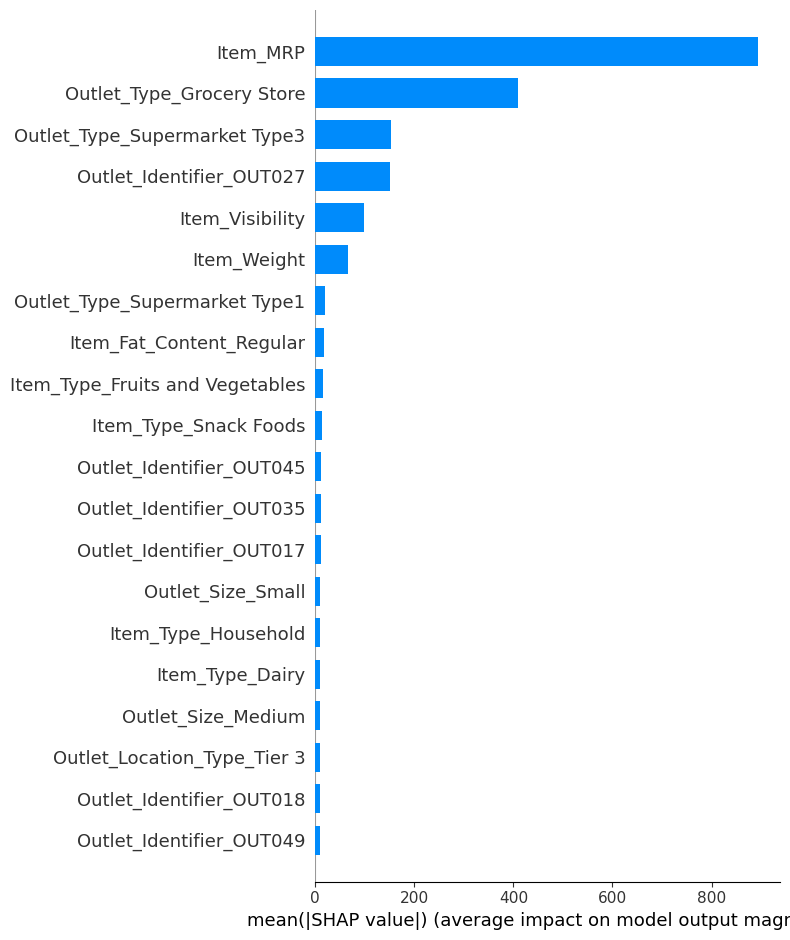

In [13]:
#Create shap bar plot
shap.summary_plot(shap_values, features = X_shap, plot_type = 'bar')

<img src="Feature Importances.png" width=60%>

- In both the SHAP plot and the original feature importancs, we see some commonalities. In both plots, Item_MRP is the top feature used, followed by Outlet_Type_Grocery Store. The SHAP plot has Item_Visibility and Item_Weight as the next features, whereas in the original feature importances plot, these two are a little further down. The other two features that round out the top 6 are Outlet_Type_Supermarket 3, and Outlet_Identifier_OUT027. Both plots show that these are the top 6 features used.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


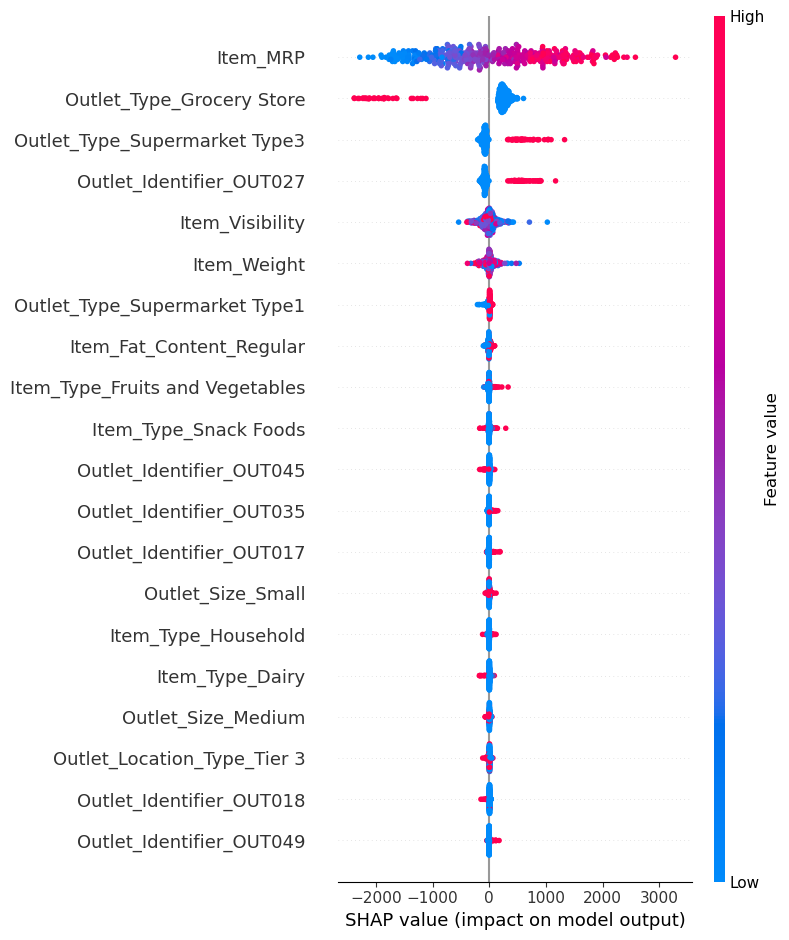

In [14]:
#Create summary dot plot
shap.summary_plot(shap_values, features = X_shap)

- The top three features are: Item_MRP, Outlet_Type_Grocery Store, and Outlet_Type_Supermarket 3.

    - Item_MRP: The SHAP plot shows a higher concentration of red values toward the right side of the plot. This means that higher values in this feature will increase and item's sales.
    - Outlet_Type_Grocery Store: For this feature, the red values are most concentrated to the left of 0. This means that if an outlet is identified as a grocery store, then an item will sell for less.
    - Outlet_Type_Supermarket 3: This feature has higher concentrations of red values greater than 0. This means that outlets that are this type will result in greater sales.

## Save SHAP Plots

In [15]:
import os
os.makedirs("images/", exist_ok=True)

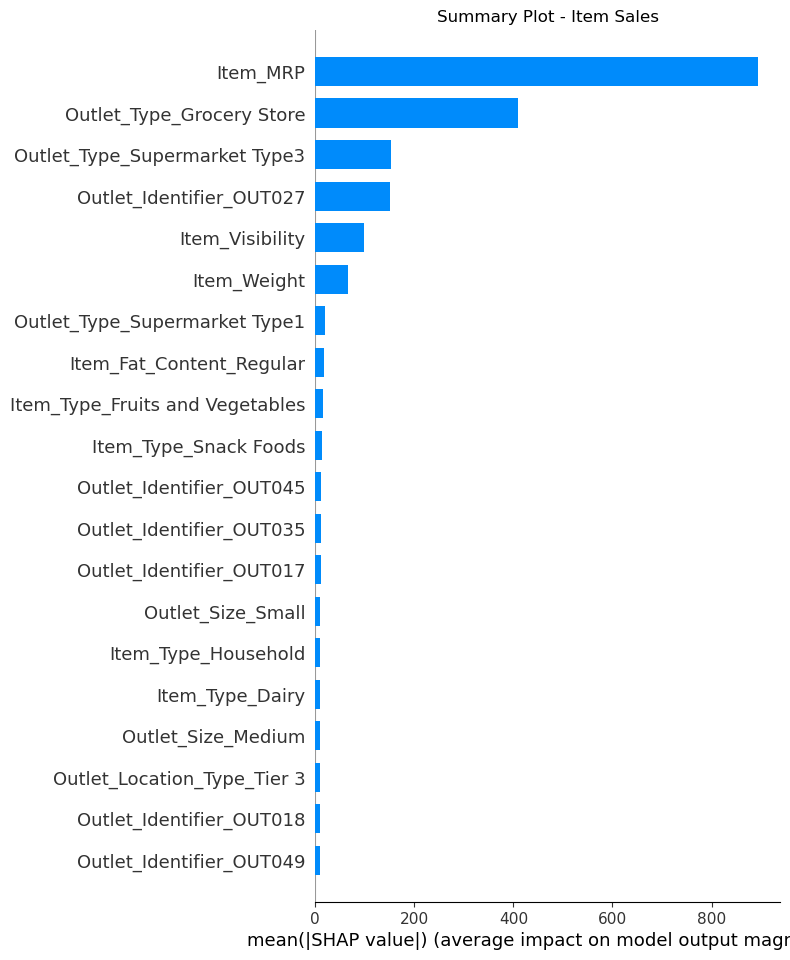

In [16]:
#Save bar plot
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap, plot_type = 'bar', show=False)
ax.set_title('Summary Plot - Item Sales');
fig.savefig('images/summary_plot_1.png')


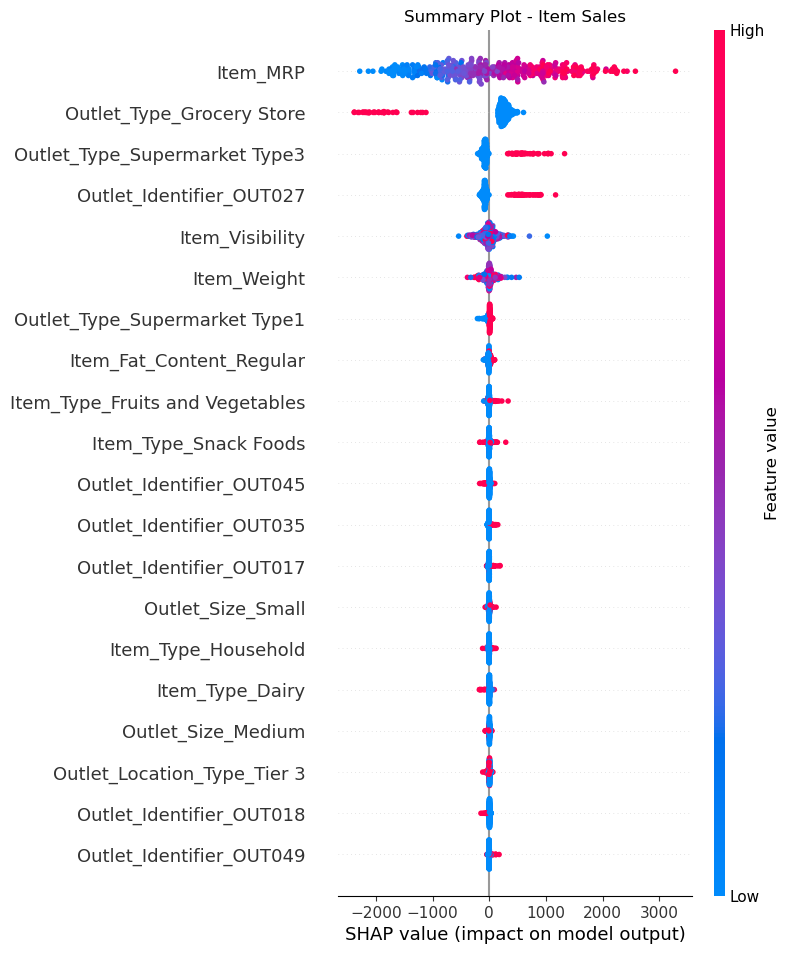

In [17]:
#Save dot plot
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap, show=False)
ax.set_title('Summary Plot - Item Sales');
fig.savefig('images/summary_plot_2.png')

## Local Explanations

In [18]:
#View global force plot
shap.force_plot(explainer.expected_value, shap_values.values, features=X_shap)

### Selecting Rows

- Based on the plots above, I will select rows using the following criteria: High Item_MRP, Outlet_Type_Grocery Store, and Outlet_Type_Supermarket 3.
- I will look at a high mrp item in each type of store and compare the values.

In [19]:
#Create high mrp filter
high_price = X_shap['Item_MRP'] > 100.00
high_price.value_counts()

True     294
False    106
Name: Item_MRP, dtype: int64

In [20]:
#Create grocery store filter
grocery = X_shap['Outlet_Type_Grocery Store'] == 1
grocery.value_counts()

False    365
True      35
Name: Outlet_Type_Grocery Store, dtype: int64

In [22]:
#Create supermarket filter
supermarket = X_shap['Outlet_Type_Supermarket Type3'] == 1
supermarket.value_counts()

False    350
True      50
Name: Outlet_Type_Supermarket Type3, dtype: int64

### Example 1:

- High Item_MRP in a grocery store

In [23]:
#Use filters to select possible rows
row_1 = X_shap[high_price & grocery].index
row_1

Int64Index([ 21,  34,  40,  42,  72,  74,  89, 104, 132, 156, 157, 174, 175,
            192, 199, 209, 213, 229, 250, 260, 262, 269, 285, 312, 332, 359,
            371, 373, 380],
           dtype='int64')

In [24]:
#Randomly select a row 
row_1_select = np.random.choice(row_1)
row_1_select

156

In [38]:
#View selected row
row = 156
print(f"- Row #: {row}")
print(f"- Target: {y_shap.iloc[row]}")
X_shap.iloc[row].round(2)

- Row #: 156
- Target: 165.7842


Item_Weight                         12.90
Item_Visibility                      0.07
Item_MRP                           167.78
Item_Fat_Content_Regular             0.00
Item_Type_Baking Goods               0.00
Item_Type_Breads                     0.00
Item_Type_Breakfast                  0.00
Item_Type_Canned                     0.00
Item_Type_Dairy                      0.00
Item_Type_Frozen Foods               0.00
Item_Type_Fruits and Vegetables      0.00
Item_Type_Hard Drinks                0.00
Item_Type_Health and Hygiene         0.00
Item_Type_Household                  1.00
Item_Type_Meat                       0.00
Item_Type_Others                     0.00
Item_Type_Seafood                    0.00
Item_Type_Snack Foods                0.00
Item_Type_Soft Drinks                0.00
Item_Type_Starchy Foods              0.00
Outlet_Identifier_OUT010             0.00
Outlet_Identifier_OUT013             0.00
Outlet_Identifier_OUT017             0.00
Outlet_Identifier_OUT018          

In [39]:
#Individual forceplot
shap.force_plot(explainer.expected_value,
                shap_values= shap_values[row].values,
               features=X_shap.iloc[row])


In [27]:
from lime.lime_tabular import LimeTabularExplainer
#Set instance of explainer
lime_explainer =LimeTabularExplainer(training_data=X_shap.values, feature_names=X_shap.columns, mode='regression')
lime_explainer

In [29]:
#LIME plot
exp = lime_explainer.explain_instance(X_shap.iloc[row],
                               loaded_model.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


#### Interpretations:

- SHAP Force Plot: 
    - For this first item, the most influential feature toward a low sale prediction is that this item is sold in a grocery store. The high item price point tries to push for a higher price, but is not able to due to the store being a grocery store and not a supermarket.
- LIME Plot: 
    - In this plot, we also see a low predicted value for this item. The three features that could lead to a higher sale is the high mrp, that it is not sold in a supermarket type 2, and that it is a household item. The store type being grocery store is still the most influential factor for the low prediction value of this item.

### Example 2:

- High mrp in a supermarket type 3

In [30]:
#Use filters to select possible rows
row_2 = X_shap[high_price & supermarket].index
row_2

Int64Index([ 14,  41,  53,  58,  94, 105, 115, 123, 159, 160, 169, 170, 179,
            184, 186, 190, 215, 224, 225, 244, 248, 256, 257, 303, 307, 326,
            330, 347, 357, 363, 367, 372, 389],
           dtype='int64')

In [31]:
#Randomly select a row
row_2_select = np.random.choice(row_2)
row_2_select

186

In [32]:
#View selected row
row = 186
print(f"- Row #: {row}")
print(f"- Target: {y_shap.iloc[row]}")
X_shap.iloc[row].round(2)

- Row #: 186
- Target: 1637.868


Item_Weight                         12.90
Item_Visibility                      0.11
Item_MRP                           108.59
Item_Fat_Content_Regular             0.00
Item_Type_Baking Goods               0.00
Item_Type_Breads                     0.00
Item_Type_Breakfast                  0.00
Item_Type_Canned                     0.00
Item_Type_Dairy                      0.00
Item_Type_Frozen Foods               0.00
Item_Type_Fruits and Vegetables      0.00
Item_Type_Hard Drinks                0.00
Item_Type_Health and Hygiene         0.00
Item_Type_Household                  0.00
Item_Type_Meat                       0.00
Item_Type_Others                     1.00
Item_Type_Seafood                    0.00
Item_Type_Snack Foods                0.00
Item_Type_Soft Drinks                0.00
Item_Type_Starchy Foods              0.00
Outlet_Identifier_OUT010             0.00
Outlet_Identifier_OUT013             0.00
Outlet_Identifier_OUT017             0.00
Outlet_Identifier_OUT018          

In [33]:
#Individual forceplot
shap.force_plot(explainer.expected_value,
                shap_values= shap_values[row].values,
               features=X_shap.iloc[row])

In [34]:
#Set instance of explainer
lime_explainer =LimeTabularExplainer(training_data=X_shap.values, feature_names=X_shap.columns, mode='regression')
lime_explainer

In [35]:
#LIME plot
exp = lime_explainer.explain_instance(X_shap.iloc[row],
                               loaded_model.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


#### Interpretations:

- SHAP Force Plot:
    - For item 2, we can see that the outlet type pushes the prediction to the right, while the item's sale price is actually not as high as it could be, and pushes back toward a lower prediction. In the future, this could be resolved by choosing a higher filter point for Item_MRP. For this item, the type of outlet plays the biggest role in getting a higher prediction sale value.
- LIME Plot:
    - In the LIME plot for this item, we see the same type of result. The type of outlet plays a much larger role in determining the sale value of this item. The item's price and type of item that it is push toward lower prediction values, while the outlet type(s) push toward higher values.

## Final Conclusions

- From the local explanations explored above, the biggest conclusion we can come to is that the type of store item's are sold at plays a large role in increasing sales. Utilizing the correct type of outlets in the future will help to increase sales overall.